# 第二节课导数部分

$$loss = \frac{1}{n} \sum{(y_i - \hat{y_i})^2}$$

$$loss = \frac{1}{n} \sum{(y_i - (kx_i+b_i))^2}$$

$$\frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - \hat{y_i})x_i}$$

$$\frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum{(y_i - \hat{y_i})}$$

In [3]:
import random
import numpy
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
data = load_boston()
X,y = data['data'],data['target']

In [4]:
def partial_k(x,y,y_hat):  #求 k 的导数
    n = len(y)
    
    gradient = 0
    
    for m,i,j in zip(list(x),list(y),list(y_hat)):
        gradient += (i-j) * m
    
    return -2 / n *  gradient

In [5]:
def partial_b(x,y,y_hat):  #求 b 的导数
    n = len(y)
    
    gradient = 0
    
    for i,j in zip(list(y),list(y_hat)):
        gradient += (i-j) 
    
    return -2 / n *  gradient

In [6]:
#此段代码几乎包括了2012-2018年深度学习研究的全部热点。
rm = X[:,5]

def price(rm,k,b): #rm相当于X
    return k * rm + b

def loss(y,y_hat):
    return sum((i - j)**2 for i,j in zip(list(y),list(y_hat))) / len(list(y))

trying_times = 10000

min_loss = float('inf')

#初始化 k 和 b
current_k = random.random()*200-100
current_b = random.random()*200-100

#为避免 x + （导数的反方向）变得过大而导致loss变大，需设置一个学习率变量，赋值一个非常小的数字，类似于0.000001
learning_rate = 1e-4

for i in range(trying_times):
    
    price_k_and_b = [price(r,current_k,current_b) for  r in rm]
       
    current_loss = loss(y,price_k_and_b)
    
    if current_loss < min_loss: #得到的结果向更好的方向发展
        min_loss = current_loss
        
        if i % 20 ==0:
            print('第{}次，best_k:{},best_b:{},and the loss is:{}'.format(i,current_k,current_b,min_loss))
        
        
    k_gradient = partial_k(rm,y,price_k_and_b)
    
    b_gradient = partial_b(rm,y,price_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate
    
    
    

第0次，best_k:-85.71414708494578,best_b:-68.69616077711522,and the loss is:401260.9133968438
第20次，best_k:-70.88041114570882,best_b:-66.36330274283767,and the loss is:288729.2188134291
第40次，best_k:-58.29777488181973,best_b:-64.38432903411984,and the loss is:207760.2638617431
第60次，best_k:-47.62462498641271,best_b:-62.70553630724768,and the loss is:149501.3733874819
第80次，best_k:-38.57118932711736,best_b:-61.28137091395634,and the loss is:107582.85876736442
第100次，best_k:-30.89166984217527,best_b:-60.07319215281602,and the loss is:77421.59315550746
第120次，best_k:-24.37756930077979,best_b:-59.04822320212607,and the loss is:55719.91901670981
第140次，best_k:-18.852030754006858,best_b:-58.17866125290406,and the loss is:40105.10140708967
第160次，best_k:-14.165035996522377,best_b:-57.440922682724,and the loss is:28869.9069181374
第180次，best_k:-10.189332680773335,best_b:-56.815002777418826,and the loss is:20785.94469286066
第200次，best_k:-6.816979507757428,best_b:-56.28393261755464,and the loss is:14969.3613

第1820次，best_k:12.022529880329238,best_b:-53.24796215961749,and the loss is:47.85266018066943
第1840次，best_k:12.022394068414389,best_b:-53.247067983385314,and the loss is:47.85225118317639
第1860次，best_k:12.022257558752974,best_b:-53.24617396087318,and the loss is:47.85184222811282
第1880次，best_k:12.022120458255555,best_b:-53.24528007527206,and the loss is:47.85143331460787
第1900次，best_k:12.021982857608554,best_b:-53.24438631232351,and the loss is:47.8510244420339
第1920次，best_k:12.021844833736317,best_b:-53.243492659932514,and the loss is:47.850615609938295
第1940次，best_k:12.02170645188956,best_b:-53.24259910783919,and the loss is:47.850206817994106
第1960次，best_k:12.021567767416906,best_b:-53.24170564734034,and the loss is:47.849798065965395
第1980次，best_k:12.021428827267547,best_b:-53.2408122710532,and the loss is:47.84938935368103
第2000次，best_k:12.021289671265908,best_b:-53.23991897271506,and the loss is:47.848980681017
第2020次，best_k:12.021150333192839,best_b:-53.239025747013265,and the lo

第3600次，best_k:12.01008645393441,best_b:-53.168608650204405,and the loss is:47.81641396468225
第3620次，best_k:12.009946599546357,best_b:-53.16771901992468,and the loss is:47.8160084645275
第3640次，best_k:12.009806751884062,best_b:-53.166829432430305,and the loss is:47.81560300337554
第3660次，best_k:12.009666910947258,best_b:-53.16593988771922,and the loss is:47.81519758122265
第3680次，best_k:12.009527076735647,best_b:-53.16505038578937,and the loss is:47.814792198065
第3700次，best_k:12.009387249248949,best_b:-53.164160926638665,and the loss is:47.814386853898874
第3720次，best_k:12.009247428486868,best_b:-53.16327151026507,and the loss is:47.81398154872052
第3740次，best_k:12.009107614449098,best_b:-53.162382136666515,and the loss is:47.81357628252625
第3760次，best_k:12.008967807135335,best_b:-53.161492805840936,and the loss is:47.8131710553122
第3780次，best_k:12.008828006545283,best_b:-53.16060351778627,and the loss is:47.81276586707475
第3800次，best_k:12.008688212678631,best_b:-53.159714272500466,and the l

第5480次，best_k:11.99696949760563,best_b:-53.08517014298255,and the loss is:47.77846692955604
第5500次，best_k:11.996830274053984,best_b:-53.08428452554079,and the loss is:47.77806507931383
第5520次，best_k:11.996691057198069,best_b:-53.08339895069136,and the loss is:47.777663267723476
第5540次，best_k:11.996551847037557,best_b:-53.08251341843219,and the loss is:47.77726149478108
第5560次，best_k:11.99641264357213,best_b:-53.08162792876126,and the loss is:47.7768597604829
第5580次，best_k:11.996273446801462,best_b:-53.080742481676474,and the loss is:47.7764580648254
第5600次，best_k:11.996134256725236,best_b:-53.07985707717582,and the loss is:47.77605640780468
第5620次，best_k:11.995995073343122,best_b:-53.07897171525721,and the loss is:47.77565478941716
第5640次，best_k:11.995855896654804,best_b:-53.07808639591864,and the loss is:47.77525320965903
第5660次，best_k:11.995716726659966,best_b:-53.077201119158055,and the loss is:47.77485166852662
第5680次，best_k:11.995577563358275,best_b:-53.076315884973404,and the los

第7340次，best_k:11.98405030988307,best_b:-53.00298966529013,and the loss is:47.74125972771858
第7360次，best_k:11.983911707658494,best_b:-53.002108000183185,and the loss is:47.74086145622865
第7380次，best_k:11.983773112099762,best_b:-53.00122637747848,and the loss is:47.74046322304623
第7400次，best_k:11.983634523206554,best_b:-53.00034479717398,and the loss is:47.740065028167635
第7420次，best_k:11.983495940978553,best_b:-52.99946325926763,and the loss is:47.73966687158914
第7440次，best_k:11.983357365415435,best_b:-52.998581763757386,and the loss is:47.73926875330711
第7460次，best_k:11.983218796516883,best_b:-52.99770031064122,and the loss is:47.73887067331787
第7480次，best_k:11.983080234282577,best_b:-52.9968188999171,and the loss is:47.73847263161772
第7500次，best_k:11.982941678712189,best_b:-52.995937531582975,and the loss is:47.738074628202895
第7520次，best_k:11.9828031298054,best_b:-52.99505620563681,and the loss is:47.737676663069806
第7540次，best_k:11.982664587561898,best_b:-52.99417492207654,and the l

第9180次，best_k:11.971326768237054,best_b:-52.9220537153788,and the loss is:47.70477864412827
第9200次，best_k:11.97118877793027,best_b:-52.92117594275315,and the loss is:47.70438388154928
第9220次，best_k:11.971050794259906,best_b:-52.920298212342544,and the loss is:47.703989156940295
第9240次，best_k:11.970912817225635,best_b:-52.91942052414494,and the loss is:47.70359447029774
第9260次，best_k:11.970774846827146,best_b:-52.9185428781583,and the loss is:47.7031998216178
第9280次，best_k:11.970636883064113,best_b:-52.917665274380596,and the loss is:47.70280521089685
第9300次，best_k:11.970498925936221,best_b:-52.9167877128098,and the loss is:47.70241063813138
第9320次，best_k:11.970360975443153,best_b:-52.91591019344387,and the loss is:47.70201610331763
第9340次，best_k:11.970223031584585,best_b:-52.915032716280805,and the loss is:47.701621606451944
第9360次，best_k:11.970085094360195,best_b:-52.91415528131854,and the loss is:47.701227147530695
第9380次，best_k:11.969947163769673,best_b:-52.913277888555086,and the l

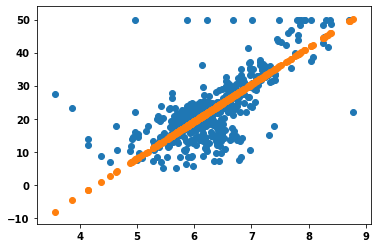

In [5]:
%matplotlib inline
k = 11.20270953888298
b = -48.032788815184375
price_k_and_b = [price(r,k,b) for  r in rm]

plt.scatter(X[:, 5], y) #实际数值
plt.scatter(rm,price_k_and_b) #预测数值

# Dynamic Programming
+ 1、Overlapping subproblems  #存在重复的子问题
+ 2、Overlapping computing saved in a table  #把重复的计算存储在一个表内
+ 3、Parse solution  #把结果解析出来

In [3]:
from collections import defaultdict

In [11]:
original_price = [1,5,8,9,10,17,17,20,24,30,28]

price = defaultdict(int)

for i,p in enumerate(original_price):
    price[i+1] = p
price[11]

28

# Get the max splitting by enumerate

In [13]:
#python可将函数作为参数输入
def example(f,arg):
    return f(arg)

def add(num):
    return num + 10

def multiple(num):
    return num * 10

print(str(example(add,100)) + '\n' + str(example(multiple,100))) # 将函数作为参数

operations = [add,multiple]

for p in operations:
    print(example(p,100))

110
1000
110
1000


In [14]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function:{} called once!'.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [15]:
def some_function_call():print("I'm function1")

In [16]:
get_call_times(some_function_call)

I'm function1
function:some_function_call called once!


In [17]:
called_time

defaultdict(int, {'some_function_call': 1})

In [18]:
call_time_with_arg = defaultdict(int)

In [14]:
def r(n):
    fname = r.__name__
    call_time_with_arg[(fname,n)] += 1
    
    return max([price[n]] + [r(i) + r(n-i) for i in range(1,n)])

r(17)

52

In [15]:
call_time_with_arg

defaultdict(int,
            {('r', 17): 1,
             ('r', 1): 28697814,
             ('r', 16): 2,
             ('r', 15): 6,
             ('r', 14): 18,
             ('r', 13): 54,
             ('r', 12): 162,
             ('r', 11): 486,
             ('r', 10): 1458,
             ('r', 9): 4374,
             ('r', 8): 13122,
             ('r', 7): 39366,
             ('r', 6): 118098,
             ('r', 5): 354294,
             ('r', 4): 1062882,
             ('r', 3): 3188646,
             ('r', 2): 9565938})

In [16]:
from collections import Counter

Counter(call_time_with_arg).most_common()

[(('r', 1), 28697814),
 (('r', 2), 9565938),
 (('r', 3), 3188646),
 (('r', 4), 1062882),
 (('r', 5), 354294),
 (('r', 6), 118098),
 (('r', 7), 39366),
 (('r', 8), 13122),
 (('r', 9), 4374),
 (('r', 10), 1458),
 (('r', 11), 486),
 (('r', 12), 162),
 (('r', 13), 54),
 (('r', 14), 18),
 (('r', 15), 6),
 (('r', 16), 2),
 (('r', 17), 1)]

In [19]:
called_time_with_arg = defaultdict(int)

def get_all_times(f):
    '''f is a function'''
    
    def wrap(n):
        #print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__,n)] += 1
        return result
    
    return wrap

In [20]:
def add_thirty(n): return n + 30

In [21]:
add_thirty_with_called_times = get_all_times(add_thirty)#接受add_thirty函数作为输入

In [22]:
add_thirty_with_called_times #返回内部函数wrap(n)

<function __main__.get_all_times.<locals>.wrap(n)>

In [23]:
add_thirty_with_called_times(40) #赋值返回wrap(40),即add_thirty(40)

70

In [24]:
called_time_with_arg #运行了次数

defaultdict(int, {('add_thirty', 40): 1})

In [25]:
add_thirty = get_all_times(add_thirty)
add_thirty(50)

80

In [26]:
#def add_thirty(n): return n + 30 利用装饰器可写成

@get_all_times  # 等价于add_thirty = get_all_times(add_thirty)
def add_thirty(n):
    return n + 30

add_thirty(50)

80

In [27]:
called_time_with_arg = defaultdict(int)

@get_all_times #等价于r = get_all_times(r)
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    #fname = r.__name__
    #call_time_with_arg[(fname,n)] += 1
    
    return max([price[n]] + [r(i) + r(n-i) for i in range(1,n)])
r(17)

48

In [28]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 28697814,
             ('r', 2): 9565938,
             ('r', 3): 3188646,
             ('r', 4): 1062882,
             ('r', 5): 354294,
             ('r', 6): 118098,
             ('r', 7): 39366,
             ('r', 8): 13122,
             ('r', 9): 4374,
             ('r', 10): 1458,
             ('r', 11): 486,
             ('r', 12): 162,
             ('r', 13): 54,
             ('r', 14): 18,
             ('r', 15): 6,
             ('r', 16): 2,
             ('r', 17): 1})

In [7]:
from functools import wraps

In [8]:
def get_all_times(f):
    '''f is a function'''
    
    @wraps(f)
    def wrap(n):
        '''HAHA,I am wrap'''
        #print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__,n)] += 1
        return result
    
    return wrap

In [31]:
r = get_all_times(r)

help(r)

Help on function wrap in module __main__:

wrap(n)



In [18]:
def memo(f): #把已经计算过的数值存储起来，加快运算速度
    already_computed = {}
    @wraps(f)
    def _wrap(arg):
        
        if arg in already_computed: 
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    
    return _wrap
        

In [21]:
called_time_with_arg = defaultdict(int)


@memo
@get_all_times #等价于r = get_all_times(r)
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    #fname = r.__name__
    #call_time_with_arg[(fname,n)] += 1
    
    return max([price[n]] + [r(i) + r(n-i) for i in range(1,n)])

r(338)

1012

In [22]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 1,
             ('r', 2): 1,
             ('r', 3): 1,
             ('r', 4): 1,
             ('r', 5): 1,
             ('r', 6): 1,
             ('r', 7): 1,
             ('r', 8): 1,
             ('r', 9): 1,
             ('r', 10): 1,
             ('r', 11): 1,
             ('r', 12): 1,
             ('r', 13): 1,
             ('r', 14): 1,
             ('r', 15): 1,
             ('r', 16): 1,
             ('r', 17): 1,
             ('r', 18): 1,
             ('r', 19): 1,
             ('r', 20): 1,
             ('r', 21): 1,
             ('r', 22): 1,
             ('r', 23): 1,
             ('r', 24): 1,
             ('r', 25): 1,
             ('r', 26): 1,
             ('r', 27): 1,
             ('r', 28): 1,
             ('r', 29): 1,
             ('r', 30): 1,
             ('r', 31): 1,
             ('r', 32): 1,
             ('r', 33): 1,
             ('r', 34): 1,
             ('r', 35): 1,
             ('r', 36): 1,
             ('r', 3

In [35]:
#得到最优值后求各个分段长度
def memo(f): #把已经计算过的数值存储起来，加快运算速度
    already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in already_computed: 
            result = already_computed[arg]
        else:
            result = f(arg)
            already_computed[arg] = result
        return result
    
    return _wrap


solution = {}

#called_time_with_arg = defaultdict(int)

#@get_all_times #等价于r = get_all_times(r)
@memo
def r(n):
     
    max_price,max_split = max([(price[n],0)] + [(r(i) + r(n-i),i) for i in range(1,n)],key=lambda x:x[0])
    
    solution[n] = (n - max_split,max_split)
    
    return max_price

In [36]:
r(12)

35

In [43]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2)}

In [38]:
def parse_solution(n):  #当长度为 n 时，达到最优解后求得把 n 分成每一段的长度
    
    left_split,right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [40]:
parse_solution(8)

[6, 2]